<a href="https://colab.research.google.com/github/labviros/computer-vision-topics/blob/version2020/lesson05-homography/sift_homography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homography Applications Examples

In [7]:
img_path='../images/'

# Rectifying a Document

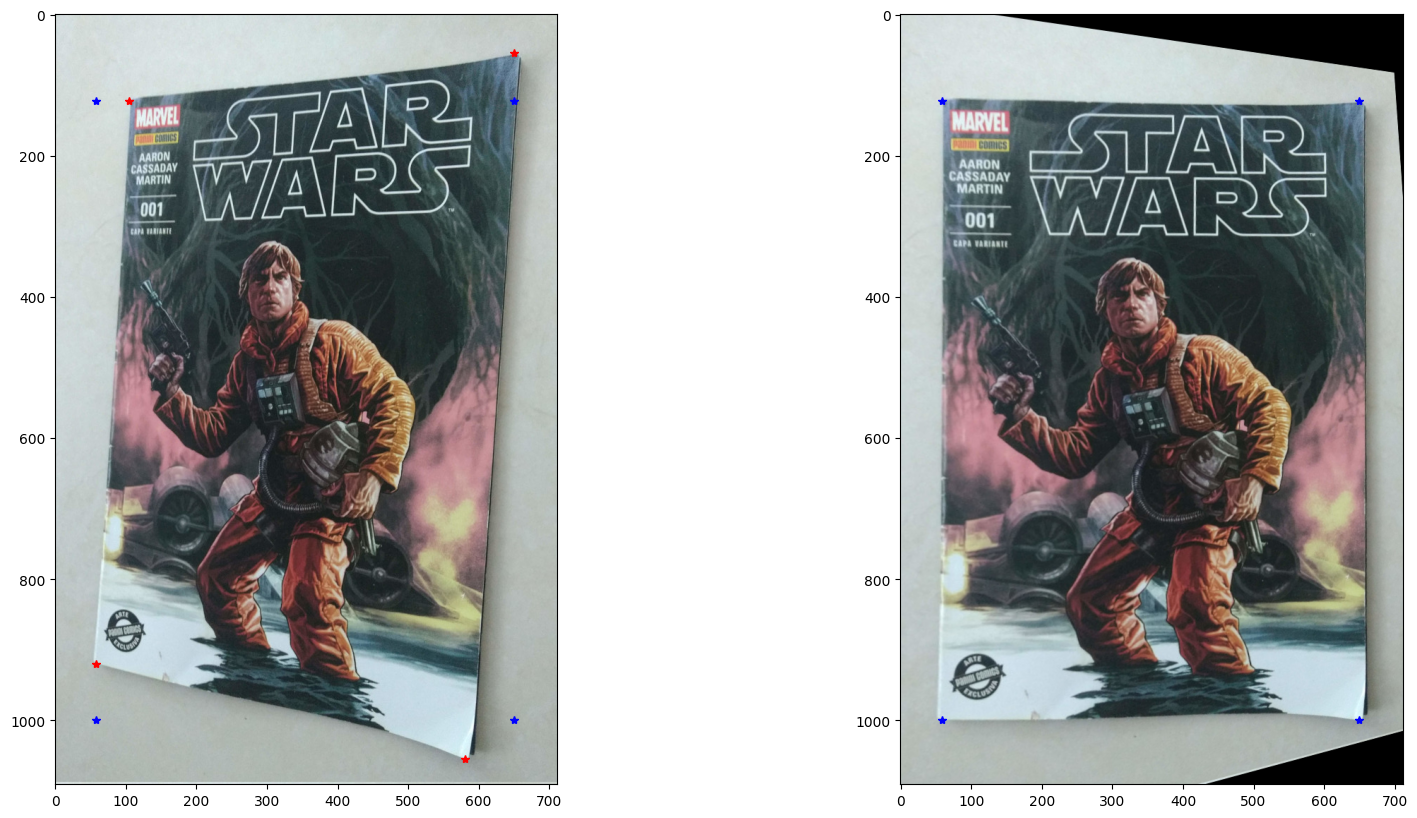

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils
#import plotly.express as px
%matplotlib inline


# Read image to be rectify
img1 = cv.imread(img_path + 'comicsStarWars02.jpg')
img1a = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

# Define four points in the source image and their corresponding destination
# coordinates to estimate the homography for rectification.
corners_img1 = np.array([[105,123],[650,55],[580,1055],[58,920]])
corners_img2 = np.array([[58,123],[650,123],[650,1000],[58,1000]])

src_pts = np.float32(corners_img1)
dst_pts = np.float32(corners_img2)

# Compute the homography and apply it to the image
M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
img4 = cv.warpPerspective(img1a, M, (img1a.shape[1],img1a.shape[0]))

# Show the result plotting the source and destination points
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(img1a)
plt.plot(corners_img2[:,0],corners_img2[:,1],'*b')
plt.plot(corners_img1[:,0],corners_img1[:,1],'*r')
ax2 = fig.add_subplot(1,2,2)
plt.imshow(img4)
plt.plot(corners_img2[:,0],corners_img2[:,1],'*b')
plt.show()

# SIFT Feature Detector

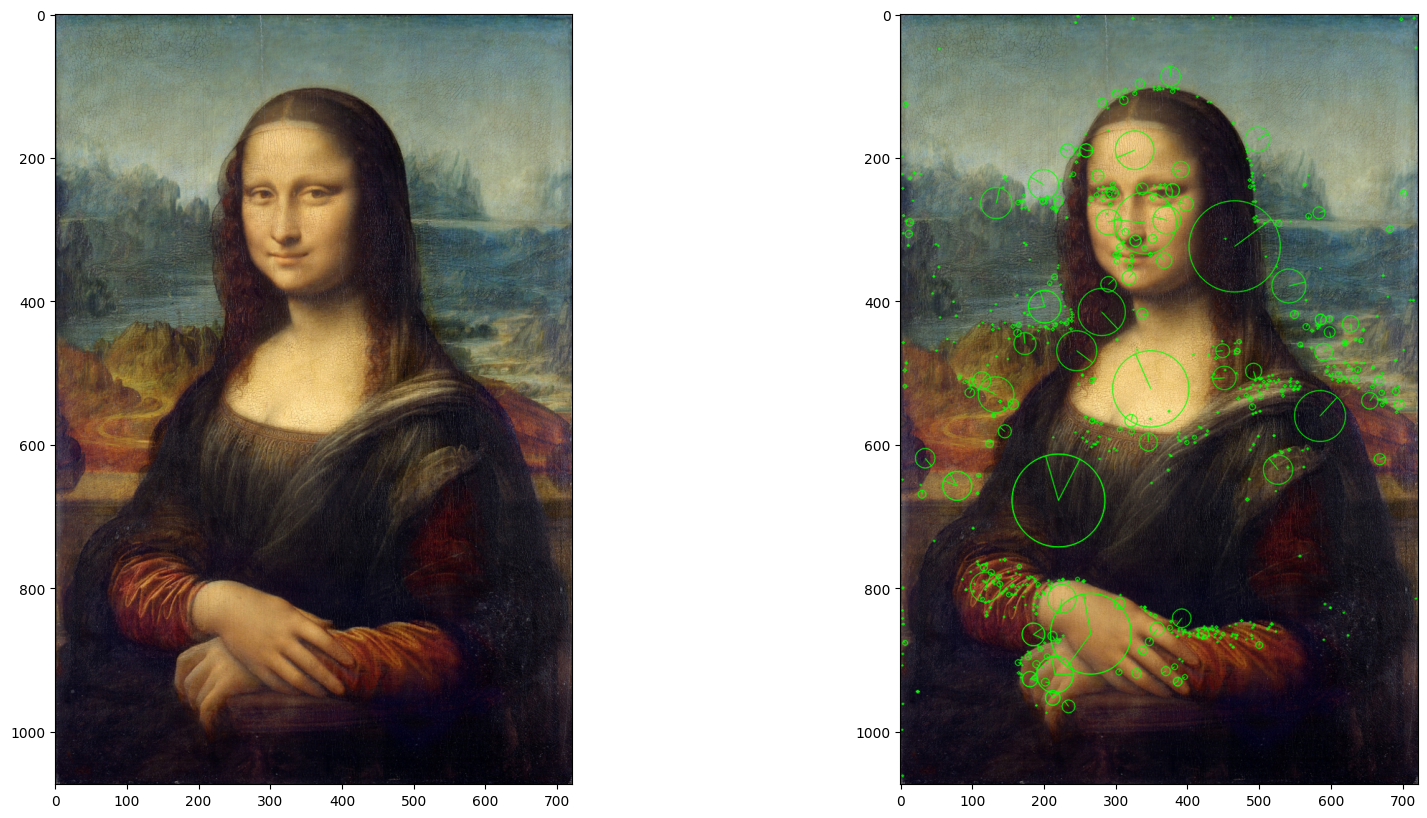

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


# Read image
img0 = cv.imread(img_path + 'monalisa01.jpg')


# Convert to RGB to show using matplotlib
rgb1 = cv.cvtColor(img0, cv.COLOR_BGR2RGB)
rgb2 = cv.cvtColor(img0, cv.COLOR_BGR2RGB)

# Creat sift object
sift = cv.SIFT_create()

# Use SIFT to detect keypoints and return their descriptors
kp, des = sift.detectAndCompute(rgb2,None)

# Draw keypoints on the image
img=cv.drawKeypoints(rgb2,kp,rgb2,(0,255, 0),flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the detected keypoints
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(rgb1)
ax2 = fig.add_subplot(1,2,2)
plt.imshow(img)
plt.show()



#Matching features using Brute Force (BF)

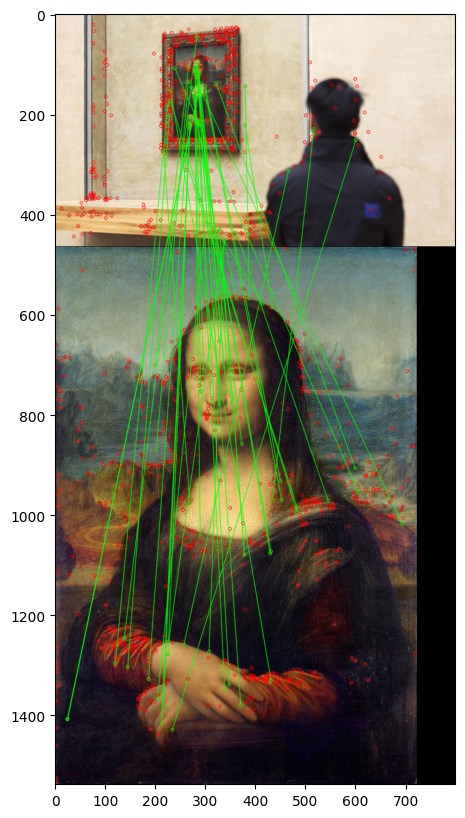

In [4]:
import numpy as np
import cv2 as cv
import imutils
from matplotlib import pyplot as plt


# Read the images
img1 = cv.imread(img_path + 'monalisa01.jpg') # queryImage
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread(img_path + 'monalisa03.jpg') # trainImage
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Rotate the images only to adjust their orientation in order to use the
# function that displays the matches
img1 = imutils.rotate_bound(img1,90)
img2 = imutils.rotate_bound(img2, 90)

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)


# Need to draw only good matches, so create a mask
# store all the good matches as per Lowe's ratio test.

good =[]
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
       good.append(m)

# Generate the image showing the matches
# Draw only the selected matches
img3 = cv.drawMatches(
    img1, kp1,    # first image and its keypoints
    img2, kp2,    # second image and its keypoints
    good, # only the good matches
    None,         # output image (None = new image)
    matchColor=(0, 255, 0),      # matches in green
    singlePointColor=(255, 0, 0),# unmatched keypoints in blue
    flags=0
)

# Show the image
fig = plt.figure(figsize=(20,10))
plt.imshow(imutils.rotate_bound(img3,-90))
plt.show()


# FLANN Matcher

FLANN stands for Fast Library for Approximate Nearest Neighbors.
It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets.

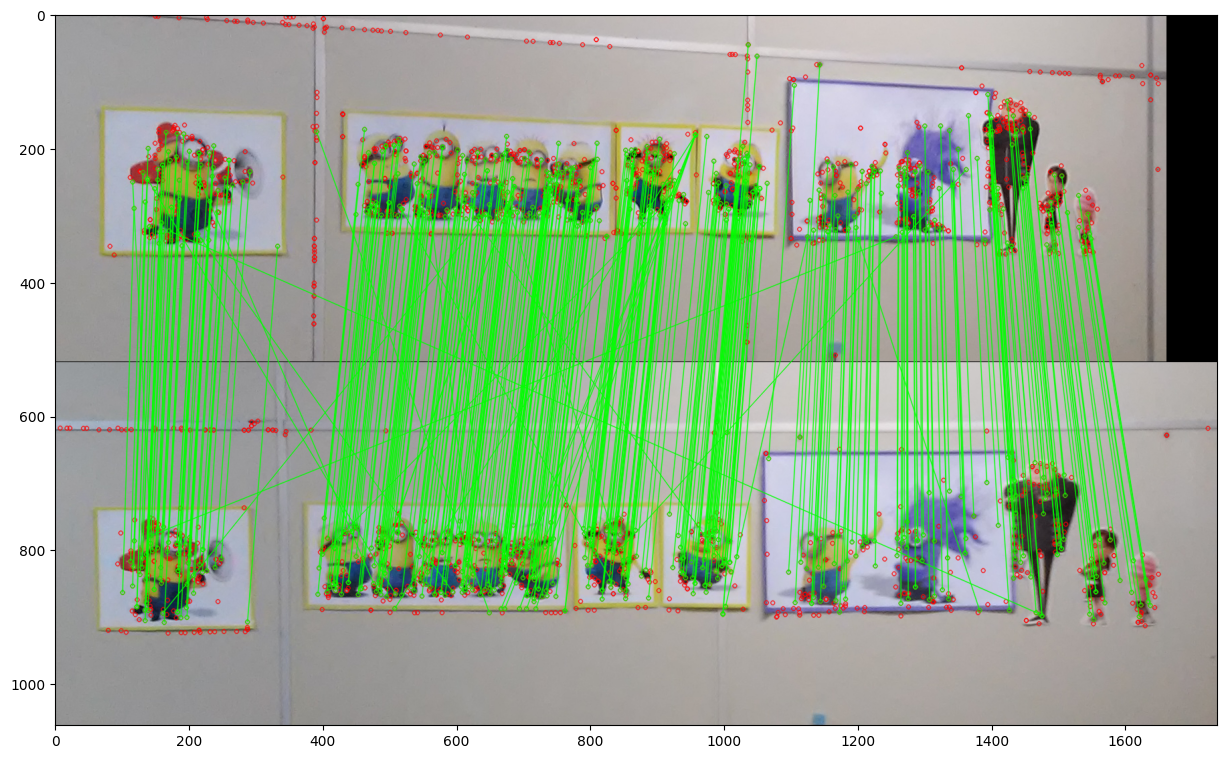

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils


# Read the images
img1 = cv.imread(img_path + 'minions01.jpg') # queryImage
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread(img_path + 'minions02.jpg') # trainImage
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Rotate the images only to adjust their orientation in order to use the
# function that displays the matches
img1 = imutils.rotate_bound(img1,90)
img2 = imutils.rotate_bound(img2, 90)


# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
# FLANN stands for Fast Library for Approximate Nearest Neighbors.
# It contains a collection of algorithms optimized for fast nearest neighbor
# search in large datasets and for high dimensional features.
# It works faster than BFMatcher for large datasets.
# The variable index_params specifies the algorithm to be used, its related parameters etc.
# For algorithms like SIFT, SURF etc. you can pass following:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# The variable search_params specifies the number of times the trees in the index should
# be recursively traversed. Higher values gives better precision, but also takes more time.
#search_params = dict(checks=50)   # or pass empty dictionary
search_params = dict()

# FLANN Matcher
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
# store all the good matches as per Lowe's ratio test.

good =[]
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
       good.append(m)


# Generate the image showing the matches
# Draw only the selected matches
img3 = cv.drawMatches(
    img1, kp1,    # first image and its keypoints
    img2, kp2,    # second image and its keypoints
    good, # only the good matches
    None,         # output image (None = new image)
    matchColor=(0, 255, 0),      # matches in green
    singlePointColor=(255, 0, 0),# unmatched keypoints in blue
    flags=0
)


# Show the image
fig = plt.figure(figsize=(15,50))
plt.imshow(imutils.rotate_bound(img3, -90))
plt.show()




#Using SIFT and Homography to find an object in an image

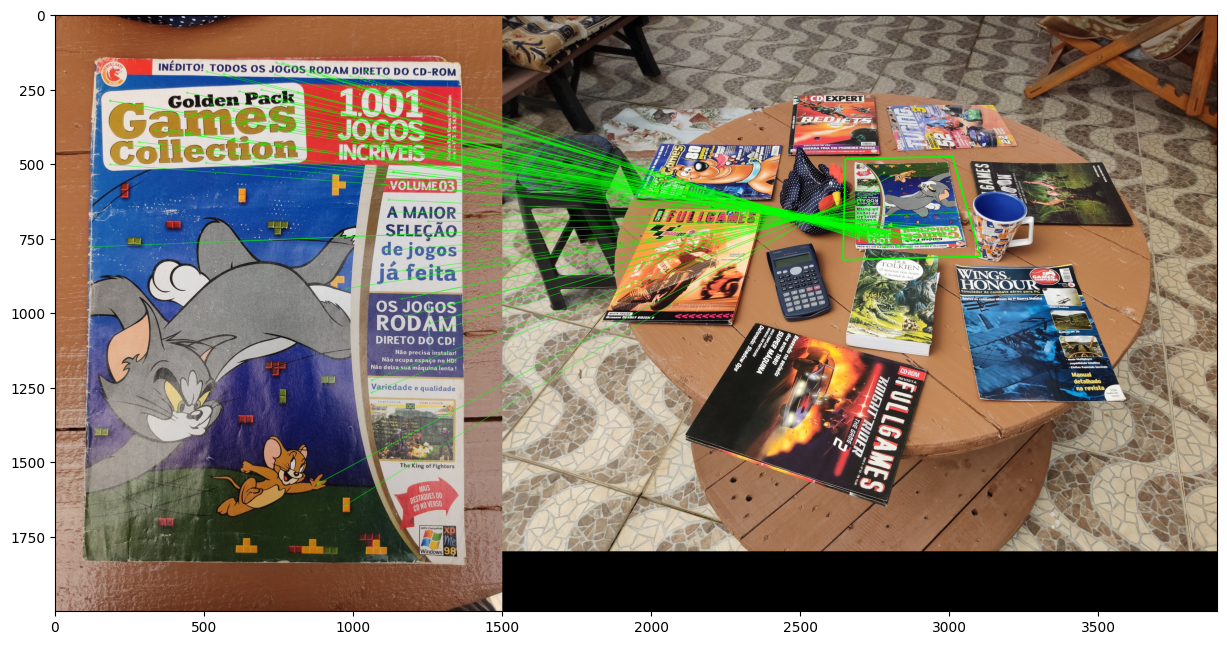

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils



MIN_MATCH_COUNT = 10

# Read the images
img1 = cv.imread(img_path + 'table_magazine01.jpg') # queryImage
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.imread(img_path + 'table.jpg') # trainImage
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)


# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN stands for Fast Library for Approximate Nearest Neighbors.
# It contains a collection of algorithms optimized for fast nearest neighbor
# search in large datasets and for high dimensional features.
# It works faster than BFMatcher for large datasets.
# The variable index_params specifies the algorithm to be used, its related parameters etc.
# For algorithms like SIFT, SURF etc. you can pass following:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# The variable search_params specifies the number of times the trees in the index should
# be recursively traversed. Higher values gives better precision, but also takes more time.
search_params = dict(checks = 50)
# FLANN Matcher
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)


# Need to draw only good matches, so create a mask
# store all the good matches as per Lowe's ratio test.

good =[]
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
       good.append(m)



# Check if there are enough matches and compute the homography
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    # Compute the homography
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,c = img1.shape
    # Define a polyline to show the warping
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    color = (0,255,0)
    img2 = cv.polylines(img2,[np.int32(dst)],True,color,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None


# Generate the image showing the matches
# Draw only the selected matches
img3 = cv.drawMatches(
    img1, kp1,    # first image and its keypoints
    img2, kp2,    # second image and its keypoints
    good, # only the good matches
    None,         # output image (None = new image)
    matchColor=(0, 255, 0),      # matches in green
    singlePointColor= None,# unmatched keypoints in blue
    matchesMask = matchesMask, # matches that satisfy the homography
    flags=2
)


# Show the image
fig = plt.figure(figsize=(15,30))
plt.imshow(img3)
plt.show()

#Using SIFT to estimate Homography between images and to warp the first image

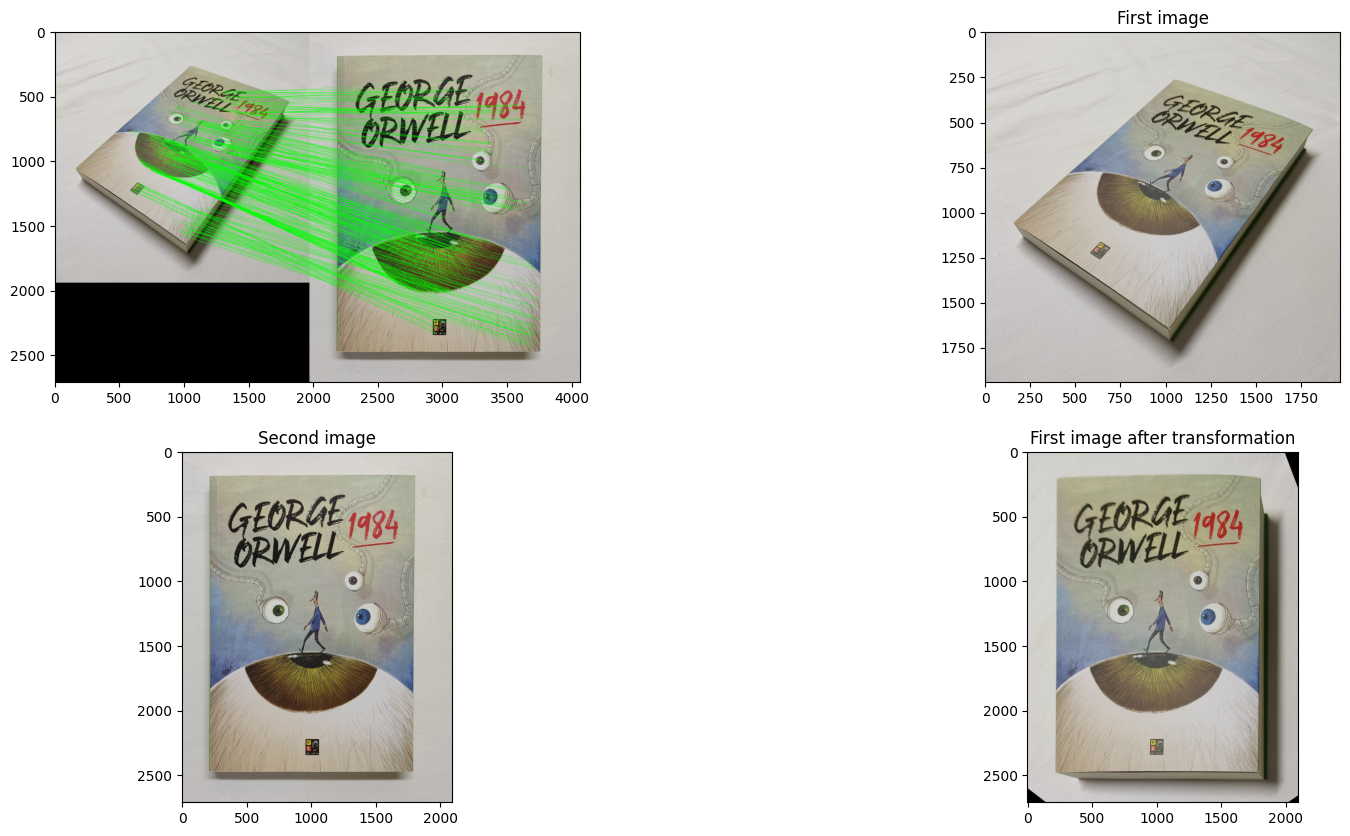

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils




MIN_MATCH_COUNT = 10

# Read the images
img1 = cv.imread(img_path + 'book02.jpg') # queryImage
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.imread(img_path + 'book01.jpg') # trainImage
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


# FLANN stands for Fast Library for Approximate Nearest Neighbors.
# It contains a collection of algorithms optimized for fast nearest neighbor
# search in large datasets and for high dimensional features.
# It works faster than BFMatcher for large datasets.
# The variable index_params specifies the algorithm to be used, its related parameters etc.
# For algorithms like SIFT, SURF etc. you can pass following:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# The variable search_params specifies the number of times the trees in the index should
# be recursively traversed. Higher values gives better precision, but also takes more time.
search_params = dict(checks = 50)
# FLANN Matcher
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)



# Need to draw only good matches, so create a mask
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.85*n.distance:
        good.append(m)


# Check if there are enough matches and compute the homography
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    # Compute the homography
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    # Warp the first image according to the estimated homography
    img4 = cv.warpPerspective(img1, M, (img2.shape[1],img2.shape[0])) 

else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None


# Generate the image showing the matches
# Draw only the selected matches
img3 = cv.drawMatches(
    img1, kp1,    # first image and its keypoints
    img2, kp2,    # second image and its keypoints
    good, # only the good matches
    None,         # output image (None = new image)
    matchColor=(0, 255, 0),      # matches in green
    singlePointColor= None,# unmatched keypoints in blue
    matchesMask = matchesMask, # matches that satisfy the homography
    flags=2
)


# Show the original images, the matches and the warped image
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
plt.imshow(img3)
ax1 = fig.add_subplot(2,2,2)
plt.title('First image')
plt.imshow(img1)
ax1 = fig.add_subplot(2,2,3)
plt.title('Second image')
plt.imshow(img2)
ax1 = fig.add_subplot(2,2,4)
plt.title('First image after transformation')
plt.imshow(img4)
plt.show()